In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

### Loading and Preprocessing Data

In [0]:
(X_data, Y_data), (X_test, Y_test) = cifar10.load_data()

In [0]:
# Normalize the data
X_data = np.divide(X_data, 255.)
X_test = np.divide(X_test, 255.)

In [0]:
n_classes = 10

## Create Validation Set

In [0]:
# Shuffle the training data
indices = np.arange(0, X_data.shape[0])
np.random.shuffle(indices)

# Build a validation set of 10000 images
X_train = X_data[indices[:40000]]
Y_train = Y_data[indices[:40000]]
X_val = X_data[indices[40000:]]
Y_val = Y_data[indices[40000:]]

## Helper Functions

In [0]:
def plot_loss(arr):

    plt.plot(arr)
    plt.xlabel("num iters")
    plt.ylabel("loss")
    plt.title("loss vs iters")
    plt.show()

def plot_acc(arr):

    plt.plot(arr)
    plt.xlabel("num iters")
    plt.ylabel("accuracy")
    plt.title("accuracy vs iters")
    plt.show()

# Models

## Model 1

In [0]:
model = keras.Sequential([
                          Conv2D(32, (5, 5), activation='relu'),
                          MaxPool2D((2, 2)),
                          Conv2D(64, (5, 5), activation='relu'),
                          MaxPool2D((2, 2)),
                          Flatten(),
                          Dense(64, activation='relu'),
                          Dense(n_classes, activation='softmax')
])

In [0]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics = ['acc'])

In [12]:
hist = model.fit(X_train, Y_train, epochs = 20, verbose = 2)

Train on 40000 samples
Epoch 1/20
40000/40000 - 8s - loss: 2.0062 - acc: 0.2684
Epoch 2/20
40000/40000 - 8s - loss: 1.6675 - acc: 0.4016
Epoch 3/20
40000/40000 - 7s - loss: 1.4995 - acc: 0.4613
Epoch 4/20
40000/40000 - 7s - loss: 1.3909 - acc: 0.5061
Epoch 5/20
40000/40000 - 7s - loss: 1.3031 - acc: 0.5370
Epoch 6/20
40000/40000 - 7s - loss: 1.2297 - acc: 0.5639
Epoch 7/20
40000/40000 - 8s - loss: 1.1658 - acc: 0.5908
Epoch 8/20
40000/40000 - 7s - loss: 1.1139 - acc: 0.6083
Epoch 9/20
40000/40000 - 7s - loss: 1.0660 - acc: 0.6273
Epoch 10/20
40000/40000 - 7s - loss: 1.0222 - acc: 0.6434
Epoch 11/20
40000/40000 - 7s - loss: 0.9818 - acc: 0.6585
Epoch 12/20
40000/40000 - 7s - loss: 0.9454 - acc: 0.6706
Epoch 13/20
40000/40000 - 8s - loss: 0.9108 - acc: 0.6839
Epoch 14/20
40000/40000 - 8s - loss: 0.8772 - acc: 0.6951
Epoch 15/20
40000/40000 - 7s - loss: 0.8460 - acc: 0.7062
Epoch 16/20
40000/40000 - 7s - loss: 0.8139 - acc: 0.7182
Epoch 17/20
40000/40000 - 7s - loss: 0.7853 - acc: 0.7307


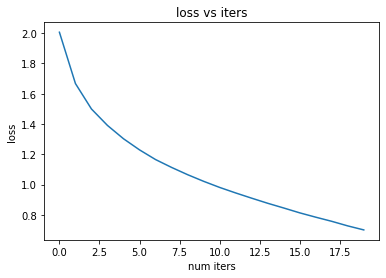

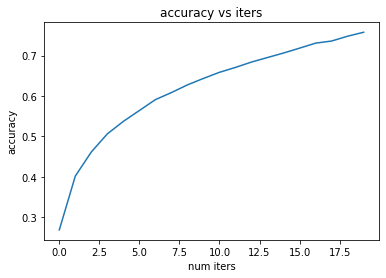

In [13]:
plot_loss(hist.history['loss'])
plot_acc(hist.history['acc'])

In [14]:
val_loss, val_acc = model.evaluate(X_val, Y_val, verbose=2)
print("Validation Loss: ", val_loss)
print("Validation Acc : ", val_acc)

10000/10000 - 1s - loss: 1.0058 - acc: 0.6606
Validation Loss:  1.0058238549232483
Validation Acc :  0.6606


## Model 2

In [0]:
model = keras.Sequential([
                          Conv2D(32, (5, 5), activation='relu'),
                          MaxPool2D((3, 3)),
                          Conv2D(64, (5, 5), activation='relu'),
                          MaxPool2D((3, 3)),
                          Flatten(),
                          Dense(64, activation='relu'),
                          Dense(n_classes, activation='softmax')
])

In [0]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics = ['acc'])

In [17]:
hist = model.fit(X_train, Y_train, epochs = 20, verbose = 2)

Train on 40000 samples
Epoch 1/20
40000/40000 - 7s - loss: 2.1229 - acc: 0.2123
Epoch 2/20
40000/40000 - 7s - loss: 1.8725 - acc: 0.3113
Epoch 3/20
40000/40000 - 7s - loss: 1.6973 - acc: 0.3868
Epoch 4/20
40000/40000 - 7s - loss: 1.5810 - acc: 0.4327
Epoch 5/20
40000/40000 - 7s - loss: 1.4964 - acc: 0.4657
Epoch 6/20
40000/40000 - 7s - loss: 1.4343 - acc: 0.4883
Epoch 7/20
40000/40000 - 7s - loss: 1.3831 - acc: 0.5082
Epoch 8/20
40000/40000 - 7s - loss: 1.3358 - acc: 0.5293
Epoch 9/20
40000/40000 - 7s - loss: 1.2921 - acc: 0.5449
Epoch 10/20
40000/40000 - 7s - loss: 1.2548 - acc: 0.5628
Epoch 11/20
40000/40000 - 7s - loss: 1.2145 - acc: 0.5745
Epoch 12/20
40000/40000 - 7s - loss: 1.1805 - acc: 0.5904
Epoch 13/20
40000/40000 - 7s - loss: 1.1524 - acc: 0.6000
Epoch 14/20
40000/40000 - 7s - loss: 1.1253 - acc: 0.6095
Epoch 15/20
40000/40000 - 7s - loss: 1.0974 - acc: 0.6184
Epoch 16/20
40000/40000 - 7s - loss: 1.0721 - acc: 0.6306
Epoch 17/20
40000/40000 - 7s - loss: 1.0505 - acc: 0.6333


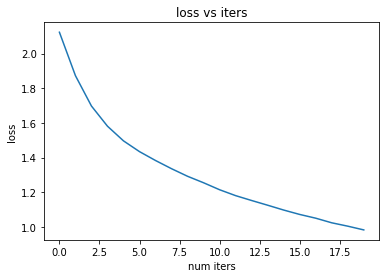

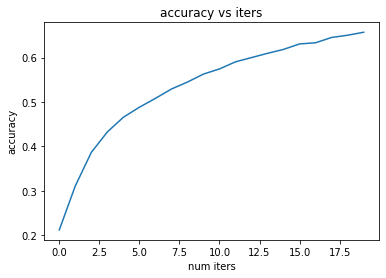

In [18]:
plot_loss(hist.history['loss'])
plot_acc(hist.history['acc'])

In [19]:
val_loss, val_acc = model.evaluate(X_val, Y_val, verbose=2)
print("Validation Loss: ", val_loss)
print("Validation Acc : ", val_acc)

10000/10000 - 1s - loss: 1.1486 - acc: 0.6068
Validation Loss:  1.148619015789032
Validation Acc :  0.6068


## Model 3

In [0]:
model = keras.Sequential([
                          Conv2D(32, (3, 3), activation='relu'),
                          MaxPool2D((2, 2)),
                          Conv2D(64, (3, 3), activation='relu'),
                          MaxPool2D((2, 2)),
                          Flatten(),
                          Dense(64, activation='relu'),
                          Dense(n_classes, activation='softmax')
])

In [0]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics = ['acc'])

In [22]:
hist = model.fit(X_train, Y_train, epochs = 20, verbose = 2)

Train on 40000 samples
Epoch 1/20
40000/40000 - 7s - loss: 2.0647 - acc: 0.2396
Epoch 2/20
40000/40000 - 7s - loss: 1.7192 - acc: 0.3862
Epoch 3/20
40000/40000 - 7s - loss: 1.5029 - acc: 0.4624
Epoch 4/20
40000/40000 - 7s - loss: 1.3974 - acc: 0.5048
Epoch 5/20
40000/40000 - 7s - loss: 1.3185 - acc: 0.5336
Epoch 6/20
40000/40000 - 7s - loss: 1.2493 - acc: 0.5600
Epoch 7/20
40000/40000 - 7s - loss: 1.1878 - acc: 0.5831
Epoch 8/20
40000/40000 - 7s - loss: 1.1331 - acc: 0.6024
Epoch 9/20
40000/40000 - 7s - loss: 1.0887 - acc: 0.6204
Epoch 10/20
40000/40000 - 7s - loss: 1.0465 - acc: 0.6357
Epoch 11/20
40000/40000 - 7s - loss: 1.0050 - acc: 0.6498
Epoch 12/20
40000/40000 - 7s - loss: 0.9715 - acc: 0.6645
Epoch 13/20
40000/40000 - 7s - loss: 0.9379 - acc: 0.6744
Epoch 14/20
40000/40000 - 7s - loss: 0.9062 - acc: 0.6862
Epoch 15/20
40000/40000 - 7s - loss: 0.8789 - acc: 0.6959
Epoch 16/20
40000/40000 - 7s - loss: 0.8481 - acc: 0.7081
Epoch 17/20
40000/40000 - 7s - loss: 0.8223 - acc: 0.7148


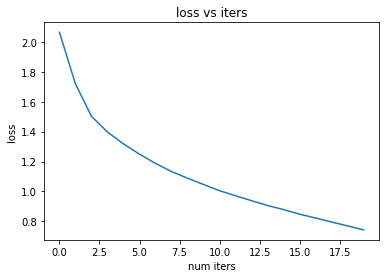

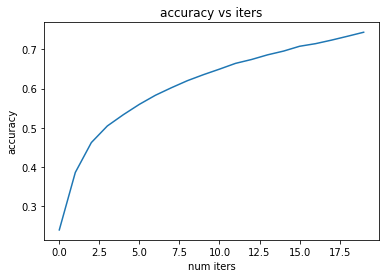

In [23]:
plot_loss(hist.history['loss'])
plot_acc(hist.history['acc'])

In [24]:
val_loss, val_acc = model.evaluate(X_val, Y_val, verbose=2)
print("Validation Loss: ", val_loss)
print("Validation Acc : ", val_acc)

10000/10000 - 1s - loss: 1.0000 - acc: 0.6549
Validation Loss:  0.9999627938270569
Validation Acc :  0.6549


## Model 4

In [0]:
model = keras.Sequential([
                          Conv2D(32, (3, 3), activation='relu'),
                          MaxPool2D((2, 2)),
                          Conv2D(64, (3, 3), activation='relu'),
                          MaxPool2D((2, 2)),
                          Conv2D(128, (3, 3), activation='relu'),
                          MaxPool2D((2, 2)),
                          Flatten(),
                          Dense(64, activation='relu'),
                          Dense(n_classes, activation='softmax')
])

In [0]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics = ['acc'])

In [27]:
hist = model.fit(X_train, Y_train, epochs = 20, verbose = 2)

Train on 40000 samples
Epoch 1/20
40000/40000 - 8s - loss: 2.1350 - acc: 0.2086
Epoch 2/20
40000/40000 - 8s - loss: 1.8656 - acc: 0.3194
Epoch 3/20
40000/40000 - 8s - loss: 1.6498 - acc: 0.4044
Epoch 4/20
40000/40000 - 8s - loss: 1.5134 - acc: 0.4538
Epoch 5/20
40000/40000 - 8s - loss: 1.4213 - acc: 0.4918
Epoch 6/20
40000/40000 - 8s - loss: 1.3401 - acc: 0.5231
Epoch 7/20
40000/40000 - 8s - loss: 1.2697 - acc: 0.5499
Epoch 8/20
40000/40000 - 8s - loss: 1.2090 - acc: 0.5731
Epoch 9/20
40000/40000 - 8s - loss: 1.1572 - acc: 0.5941
Epoch 10/20
40000/40000 - 8s - loss: 1.1044 - acc: 0.6126
Epoch 11/20
40000/40000 - 8s - loss: 1.0595 - acc: 0.6314
Epoch 12/20
40000/40000 - 8s - loss: 1.0181 - acc: 0.6467
Epoch 13/20
40000/40000 - 8s - loss: 0.9760 - acc: 0.6602
Epoch 14/20
40000/40000 - 8s - loss: 0.9411 - acc: 0.6745
Epoch 15/20
40000/40000 - 8s - loss: 0.9071 - acc: 0.6836
Epoch 16/20
40000/40000 - 8s - loss: 0.8735 - acc: 0.6960
Epoch 17/20
40000/40000 - 8s - loss: 0.8393 - acc: 0.7094


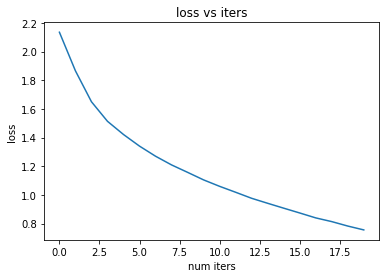

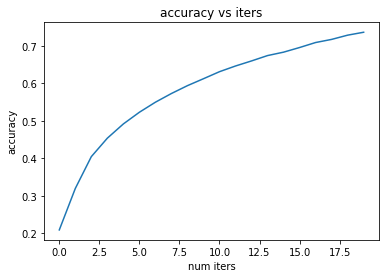

In [28]:
plot_loss(hist.history['loss'])
plot_acc(hist.history['acc'])

In [29]:
val_loss, val_acc = model.evaluate(X_val, Y_val, verbose=2)
print("Validation Loss: ", val_loss)
print("Validation Acc : ", val_acc)

10000/10000 - 1s - loss: 0.9548 - acc: 0.6744
Validation Loss:  0.9547530891418458
Validation Acc :  0.6744


## Best model among models 1, 2, 3 and 4: Model 4

- Model 4 gave the best validation accuracy as well as validation loss from among the four models
- We may have obtained this result because model 4 has one more convolutional and max pooling layer, which would have helped it to learn a more complex function than those functions learnt by models 1, 2 and 3.


## Model 5

### Chosen model: -
- Actual best model: model 4
- Chosen model: model 1 (because of the negative dimension problem in model 4)

In [0]:
model = keras.Sequential([
                          Conv2D(32, (5, 5), (2, 2), activation='relu'),
                          MaxPool2D((2, 2)),
                          Conv2D(64, (5, 5), (2, 2), activation='relu'),
                          MaxPool2D((2, 2)),
                          Flatten(),
                          Dense(64, activation='relu'),
                          Dense(n_classes, activation='softmax')
])

In [0]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics = ['acc'])

In [42]:
hist = model.fit(X_train, Y_train, epochs = 20, verbose = 2)

Train on 40000 samples
Epoch 1/20
40000/40000 - 6s - loss: 2.0881 - acc: 0.2280
Epoch 2/20
40000/40000 - 6s - loss: 1.8366 - acc: 0.3286
Epoch 3/20
40000/40000 - 6s - loss: 1.6604 - acc: 0.3959
Epoch 4/20
40000/40000 - 6s - loss: 1.5371 - acc: 0.4413
Epoch 5/20
40000/40000 - 6s - loss: 1.4597 - acc: 0.4742
Epoch 6/20
40000/40000 - 6s - loss: 1.3969 - acc: 0.4998
Epoch 7/20
40000/40000 - 6s - loss: 1.3455 - acc: 0.5195
Epoch 8/20
40000/40000 - 6s - loss: 1.3004 - acc: 0.5350
Epoch 9/20
40000/40000 - 6s - loss: 1.2571 - acc: 0.5534
Epoch 10/20
40000/40000 - 6s - loss: 1.2245 - acc: 0.5656
Epoch 11/20
40000/40000 - 6s - loss: 1.1840 - acc: 0.5793
Epoch 12/20
40000/40000 - 6s - loss: 1.1544 - acc: 0.5907
Epoch 13/20
40000/40000 - 6s - loss: 1.1232 - acc: 0.6023
Epoch 14/20
40000/40000 - 6s - loss: 1.0961 - acc: 0.6107
Epoch 15/20
40000/40000 - 6s - loss: 1.0663 - acc: 0.6229
Epoch 16/20
40000/40000 - 6s - loss: 1.0400 - acc: 0.6334
Epoch 17/20
40000/40000 - 6s - loss: 1.0164 - acc: 0.6408


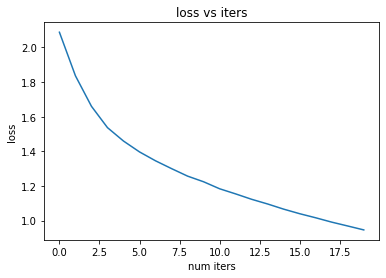

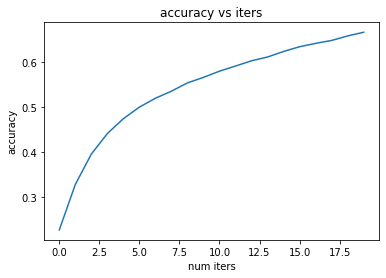

In [43]:
plot_loss(hist.history['loss'])
plot_acc(hist.history['acc'])

In [44]:
val_loss, val_acc = model.evaluate(X_val, Y_val, verbose=2)
print("Validation Loss: ", val_loss)
print("Validation Acc : ", val_acc)

10000/10000 - 1s - loss: 1.1285 - acc: 0.6069
Validation Loss:  1.1285111995697021
Validation Acc :  0.6069


## Model 6

### Chosen model: -
- Model 4 is the chosen model.
- We have chosen this because it was the best among models 1 to 4 in terms of validation accuracy and validation loss

In [0]:
model = keras.Sequential([
                          Conv2D(32, (3, 3), padding='same', activation='relu'),
                          MaxPool2D((2, 2)),
                          Conv2D(64, (3, 3), padding='same', activation='relu'),
                          MaxPool2D((2, 2)),
                          Conv2D(128, (3, 3), padding='same', activation='relu'),
                          MaxPool2D((2, 2)),
                          Flatten(),
                          Dense(64, activation='relu'),
                          Dense(n_classes, activation='softmax')
])

In [0]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics = ['acc'])

In [47]:
hist = model.fit(X_train, Y_train, epochs = 20, verbose = 2)

Train on 40000 samples
Epoch 1/20
40000/40000 - 9s - loss: 2.0658 - acc: 0.2449
Epoch 2/20
40000/40000 - 8s - loss: 1.6921 - acc: 0.3952
Epoch 3/20
40000/40000 - 8s - loss: 1.5088 - acc: 0.4581
Epoch 4/20
40000/40000 - 8s - loss: 1.3974 - acc: 0.5009
Epoch 5/20
40000/40000 - 9s - loss: 1.3020 - acc: 0.5384
Epoch 6/20
40000/40000 - 8s - loss: 1.2202 - acc: 0.5685
Epoch 7/20
40000/40000 - 8s - loss: 1.1460 - acc: 0.5958
Epoch 8/20
40000/40000 - 8s - loss: 1.0781 - acc: 0.6205
Epoch 9/20
40000/40000 - 8s - loss: 1.0181 - acc: 0.6438
Epoch 10/20
40000/40000 - 8s - loss: 0.9619 - acc: 0.6635
Epoch 11/20
40000/40000 - 8s - loss: 0.9134 - acc: 0.6849
Epoch 12/20
40000/40000 - 8s - loss: 0.8684 - acc: 0.7006
Epoch 13/20
40000/40000 - 8s - loss: 0.8264 - acc: 0.7120
Epoch 14/20
40000/40000 - 8s - loss: 0.7886 - acc: 0.7258
Epoch 15/20
40000/40000 - 8s - loss: 0.7496 - acc: 0.7408
Epoch 16/20
40000/40000 - 8s - loss: 0.7163 - acc: 0.7522
Epoch 17/20
40000/40000 - 8s - loss: 0.6792 - acc: 0.7652


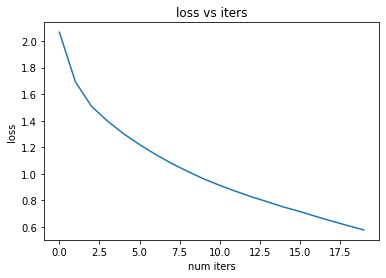

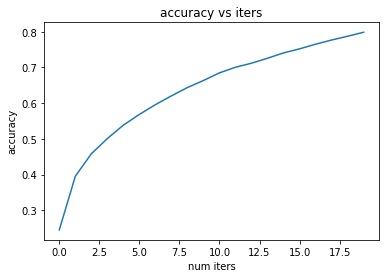

In [48]:
plot_loss(hist.history['loss'])
plot_acc(hist.history['acc'])

In [49]:
val_loss, val_acc = model.evaluate(X_val, Y_val, verbose=2)
print("Validation Loss: ", val_loss)
print("Validation Acc : ", val_acc)

10000/10000 - 1s - loss: 0.9223 - acc: 0.6940
Validation Loss:  0.9222947300434112
Validation Acc :  0.694


## Model 7

### Chosen model: -
- Actual best model: model 4
- Chosen model: model 1 (because of the negative dimension problem in model 4)

In [0]:
model = keras.Sequential([
                          Conv2D(32, (5, 5), (2, 2), padding = 'same', activation='relu'),
                          MaxPool2D((2, 2)),
                          Conv2D(64, (5, 5), (2, 2), padding = 'same', activation='relu'),
                          MaxPool2D((2, 2)),
                          Flatten(),
                          Dense(64, activation='relu'),
                          Dense(n_classes, activation='softmax')
])

In [0]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics = ['acc'])

In [55]:
hist = model.fit(X_train, Y_train, epochs = 20, verbose = 2)

Train on 40000 samples
Epoch 1/20
40000/40000 - 6s - loss: 2.0684 - acc: 0.2493
Epoch 2/20
40000/40000 - 6s - loss: 1.7416 - acc: 0.3747
Epoch 3/20
40000/40000 - 6s - loss: 1.5688 - acc: 0.4327
Epoch 4/20
40000/40000 - 6s - loss: 1.4590 - acc: 0.4748
Epoch 5/20
40000/40000 - 6s - loss: 1.3763 - acc: 0.5072
Epoch 6/20
40000/40000 - 6s - loss: 1.3090 - acc: 0.5348
Epoch 7/20
40000/40000 - 6s - loss: 1.2549 - acc: 0.5531
Epoch 8/20
40000/40000 - 6s - loss: 1.2091 - acc: 0.5703
Epoch 9/20
40000/40000 - 6s - loss: 1.1653 - acc: 0.5867
Epoch 10/20
40000/40000 - 6s - loss: 1.1271 - acc: 0.5998
Epoch 11/20
40000/40000 - 6s - loss: 1.0877 - acc: 0.6154
Epoch 12/20
40000/40000 - 6s - loss: 1.0525 - acc: 0.6316
Epoch 13/20
40000/40000 - 6s - loss: 1.0209 - acc: 0.6415
Epoch 14/20
40000/40000 - 6s - loss: 0.9925 - acc: 0.6493
Epoch 15/20
40000/40000 - 6s - loss: 0.9676 - acc: 0.6618
Epoch 16/20
40000/40000 - 6s - loss: 0.9393 - acc: 0.6710
Epoch 17/20
40000/40000 - 6s - loss: 0.9137 - acc: 0.6790


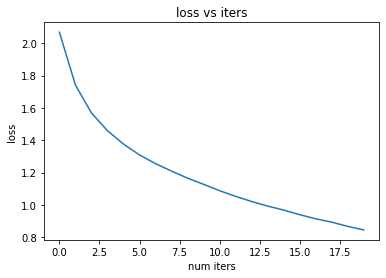

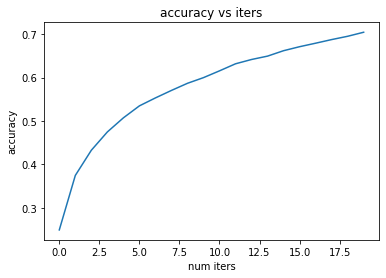

In [56]:
plot_loss(hist.history['loss'])
plot_acc(hist.history['acc'])

In [57]:
val_loss, val_acc = model.evaluate(X_val, Y_val, verbose=2)
print("Validation Loss: ", val_loss)
print("Validation Acc : ", val_acc)

10000/10000 - 1s - loss: 1.0358 - acc: 0.6438
Validation Loss:  1.0358184490203857
Validation Acc :  0.6438


## Model 8

### Chosen model: -
- Model 6 is chosen because it has the best validation accuracy and validation loss among models 1 to 7

In [0]:
model = keras.Sequential([
                          Conv2D(32, (3, 3), padding='same', activation='tanh'),
                          MaxPool2D((2, 2)),
                          Conv2D(64, (3, 3), padding='same', activation='tanh'),
                          MaxPool2D((2, 2)),
                          Conv2D(128, (3, 3), padding='same', activation='tanh'),
                          MaxPool2D((2, 2)),
                          Flatten(),
                          Dense(64, activation='tanh'),
                          Dense(n_classes, activation='softmax')
])

In [0]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics = ['acc'])

In [60]:
hist = model.fit(X_train, Y_train, epochs = 20, verbose = 2)

Train on 40000 samples
Epoch 1/20
40000/40000 - 9s - loss: 1.8437 - acc: 0.3428
Epoch 2/20
40000/40000 - 9s - loss: 1.5120 - acc: 0.4643
Epoch 3/20
40000/40000 - 9s - loss: 1.3613 - acc: 0.5181
Epoch 4/20
40000/40000 - 9s - loss: 1.2486 - acc: 0.5598
Epoch 5/20
40000/40000 - 9s - loss: 1.1572 - acc: 0.5924
Epoch 6/20
40000/40000 - 9s - loss: 1.0737 - acc: 0.6219
Epoch 7/20
40000/40000 - 8s - loss: 1.0027 - acc: 0.6494
Epoch 8/20
40000/40000 - 8s - loss: 0.9441 - acc: 0.6710
Epoch 9/20
40000/40000 - 8s - loss: 0.8918 - acc: 0.6907
Epoch 10/20
40000/40000 - 8s - loss: 0.8455 - acc: 0.7056
Epoch 11/20
40000/40000 - 8s - loss: 0.8052 - acc: 0.7217
Epoch 12/20
40000/40000 - 9s - loss: 0.7660 - acc: 0.7372
Epoch 13/20
40000/40000 - 8s - loss: 0.7315 - acc: 0.7485
Epoch 14/20
40000/40000 - 8s - loss: 0.6958 - acc: 0.7612
Epoch 15/20
40000/40000 - 8s - loss: 0.6628 - acc: 0.7743
Epoch 16/20
40000/40000 - 8s - loss: 0.6296 - acc: 0.7849
Epoch 17/20
40000/40000 - 8s - loss: 0.5992 - acc: 0.7962


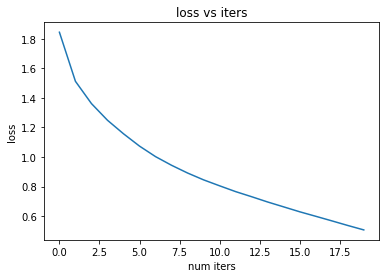

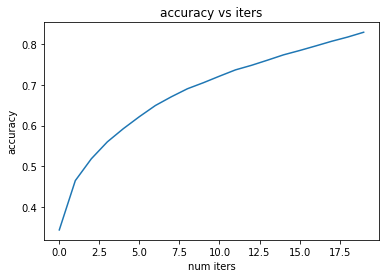

In [61]:
plot_loss(hist.history['loss'])
plot_acc(hist.history['acc'])

In [62]:
val_loss, val_acc = model.evaluate(X_val, Y_val, verbose=2)
print("Validation Loss: ", val_loss)
print("Validation Acc : ", val_acc)

10000/10000 - 1s - loss: 0.8441 - acc: 0.7092
Validation Loss:  0.8441179809570313
Validation Acc :  0.7092


## Model 9

### Chosen model: -
- Model 6 is chosen because it has the best validation accuracy and validation loss among models 1 to 7

In [0]:
model = keras.Sequential([
                          Conv2D(32, (3, 3), padding='same', activation='sigmoid'),
                          MaxPool2D((2, 2)),
                          Conv2D(64, (3, 3), padding='same', activation='sigmoid'),
                          MaxPool2D((2, 2)),
                          Conv2D(128, (3, 3), padding='same', activation='sigmoid'),
                          MaxPool2D((2, 2)),
                          Flatten(),
                          Dense(64, activation='sigmoid'),
                          Dense(n_classes, activation='softmax')
])

In [0]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics = ['acc'])

In [65]:
hist = model.fit(X_train, Y_train, epochs = 20, verbose = 2)

Train on 40000 samples
Epoch 1/20
40000/40000 - 9s - loss: 2.3078 - acc: 0.0975
Epoch 2/20
40000/40000 - 9s - loss: 2.3066 - acc: 0.0993
Epoch 3/20
40000/40000 - 9s - loss: 2.3059 - acc: 0.1014
Epoch 4/20
40000/40000 - 8s - loss: 2.3061 - acc: 0.0981
Epoch 5/20
40000/40000 - 8s - loss: 2.3057 - acc: 0.0983
Epoch 6/20
40000/40000 - 8s - loss: 2.3052 - acc: 0.0989
Epoch 7/20
40000/40000 - 9s - loss: 2.3051 - acc: 0.0990
Epoch 8/20
40000/40000 - 8s - loss: 2.3050 - acc: 0.0962
Epoch 9/20
40000/40000 - 9s - loss: 2.3042 - acc: 0.1004
Epoch 10/20
40000/40000 - 9s - loss: 2.3044 - acc: 0.0998
Epoch 11/20
40000/40000 - 8s - loss: 2.3043 - acc: 0.0987
Epoch 12/20
40000/40000 - 8s - loss: 2.3042 - acc: 0.0973
Epoch 13/20
40000/40000 - 9s - loss: 2.3041 - acc: 0.0998
Epoch 14/20
40000/40000 - 9s - loss: 2.3039 - acc: 0.1011
Epoch 15/20
40000/40000 - 8s - loss: 2.3040 - acc: 0.0977
Epoch 16/20
40000/40000 - 8s - loss: 2.3040 - acc: 0.0982
Epoch 17/20
40000/40000 - 8s - loss: 2.3038 - acc: 0.0998


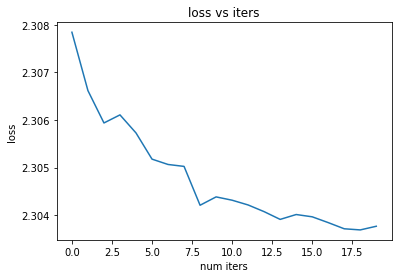

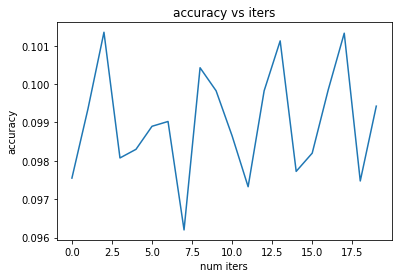

In [66]:
plot_loss(hist.history['loss'])
plot_acc(hist.history['acc'])

In [67]:
val_loss, val_acc = model.evaluate(X_val, Y_val, verbose=2)
print("Validation Loss: ", val_loss)
print("Validation Acc : ", val_acc)

10000/10000 - 1s - loss: 2.3034 - acc: 0.0986
Validation Loss:  2.3033866577148436
Validation Acc :  0.0986


## Best Model

### Model 8

- This is the best model from among all the models, i.e. models 1 to 9
- It has the highest accuracy and least validation loss

In [0]:
model = keras.Sequential([
                          Conv2D(32, (3, 3), padding='same', activation='tanh'),
                          MaxPool2D((2, 2)),
                          Conv2D(64, (3, 3), padding='same', activation='tanh'),
                          MaxPool2D((2, 2)),
                          Conv2D(128, (3, 3), padding='same', activation='tanh'),
                          MaxPool2D((2, 2)),
                          Flatten(),
                          Dense(64, activation='tanh'),
                          Dense(n_classes, activation='softmax')
])

In [0]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics = ['acc'])

In [0]:
_ = model.fit(X_train, Y_train, epochs = 20, verbose = 0)

In [73]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print("Test Loss: ", test_loss)
print("Test Acc : ", test_acc)

10000/10000 - 1s - loss: 0.8828 - acc: 0.7067
Test Loss:  0.882759896850586
Test Acc :  0.7067
